In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df = pd.DataFrame(data)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Handling Missing values mean/median/imputation.

Missing Values in Age, Embarked, Cabin columns


In [125]:
df_imputed = df.copy()

# 1. Impute missing values in 'Age' using the median
df_imputed["Age"] = df_imputed["Age"].fillna(df_imputed["Age"].median())
df_imputed["Age"] = df_imputed["Age"].round(0).astype("Int64")

# 2. Impute missing values in 'Embarked' using the mode (most frequent value)
df_imputed["Embarked"] = df_imputed["Embarked"].fillna(df_imputed["Embarked"].mode()[0])

# 3. Impute missing values in 'Cabin' using a placeholder value like 'Unknown'
df_imputed["Cabin"] = df_imputed["Cabin"].fillna("Unknown")

In [126]:
# Check if there are any missing values left
print("Missing values after imputation:\n", df_imputed.isnull().sum())

Missing values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [127]:
df_imputed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


Convert categorical features into numerical using encoding.

label encoding Sex Male as 0 and Female as 1
One-Hot Encoding 'Embarked' into Embarked_C, Embarked_Q, Embarked_S

In [128]:
df_encoded = df_imputed.copy()
df_encoded["Sex"] = df_encoded["Sex"].map({"male": 0, "female": 1})
# Step 4: One-Hot Encode 'Embarked'
df_encoded = pd.get_dummies(df_encoded, columns=["Embarked"], drop_first=False)

# Display the result
df_encoded[['Sex','Embarked_C',"Embarked_Q","Embarked_S"]].head(15)

,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,False,False,True
1,1,True,False,False
2,1,False,False,True
3,1,False,False,True
4,0,False,False,True
5,0,False,True,False
6,0,False,False,True
7,0,False,False,True
8,1,False,False,True
9,1,True,False,False


Normalize/standardize the numerical features.

In [129]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ["Age", "Fare", "SibSp", "Parch"]

# Create a scaler
scaler = StandardScaler()

# Fit and transform
df_standardized = df_imputed.copy()
df_standardized[num_cols] = scaler.fit_transform(df_standardized[num_cols])

df_standardized[num_cols].head(15)


,Age,Fare,SibSp,Parch
0,-0.565459,-0.502445,0.432793,-0.473674
1,0.664317,0.786845,0.432793,-0.473674
2,-0.258015,-0.488854,-0.474545,-0.473674
3,0.433734,0.420730,0.432793,-0.473674
4,0.433734,-0.486337,-0.474545,-0.473674
5,-0.104293,-0.478116,-0.474545,-0.473674
6,1.894092,0.395814,-0.474545,-0.473674
7,-2.102678,-0.224083,2.247470,0.767630
8,-0.181154,-0.424256,-0.474545,2.008933
9,-1.180346,-0.042956,0.432793,-0.473674


In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df_imputed.copy()
df_normalized[num_cols] = scaler.fit_transform(df_normalized[num_cols])

df_normalized[num_cols].head(15)


,Age,Fare,SibSp,Parch
0,0.2750,0.014151,0.125,0.000000
1,0.4750,0.139136,0.125,0.000000
2,0.3250,0.015469,0.000,0.000000
3,0.4375,0.103644,0.125,0.000000
4,0.4375,0.015713,0.000,0.000000
5,0.3500,0.016510,0.000,0.000000
6,0.6750,0.101229,0.000,0.000000
7,0.0250,0.041136,0.375,0.166667
8,0.3375,0.021731,0.000,0.333333
9,0.1750,0.058694,0.125,0.000000


Visualize outliers using box-plots and remove them.


In [131]:
df_outlier = df_normalized.copy()
num_cols = ["Age", "Fare", "SibSp", "Parch"]

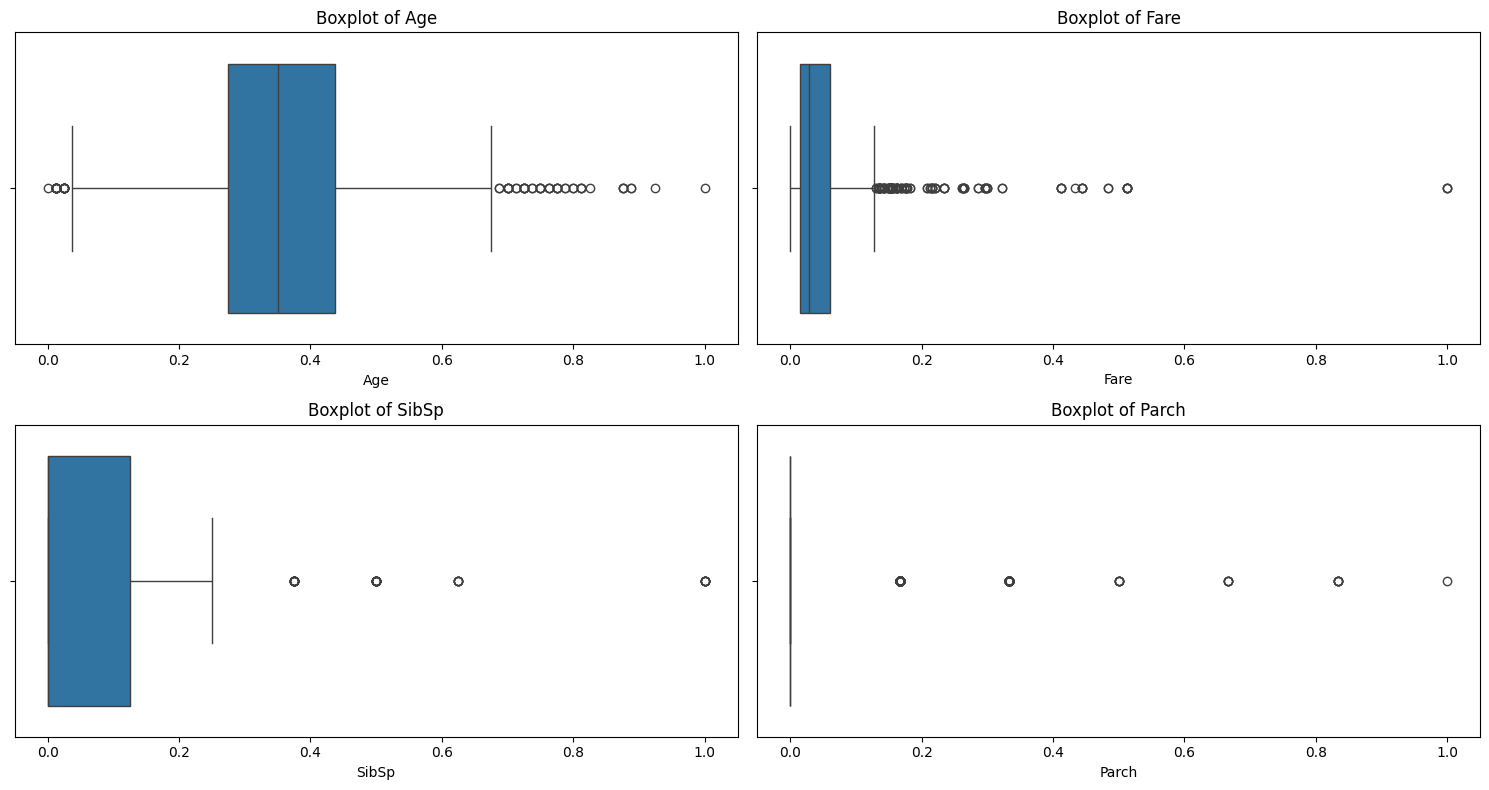

In [132]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_outlier[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Removing outliers using the IQR Method

In [133]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to all numerical columns
for col in num_cols:
    df_outlier = remove_outliers(df_outlier, col)

# Check shape after outlier removal
print("Shape after outlier removal:", df_outlier.shape)


Shape after outlier removal: (577, 12)


After removing the outliers

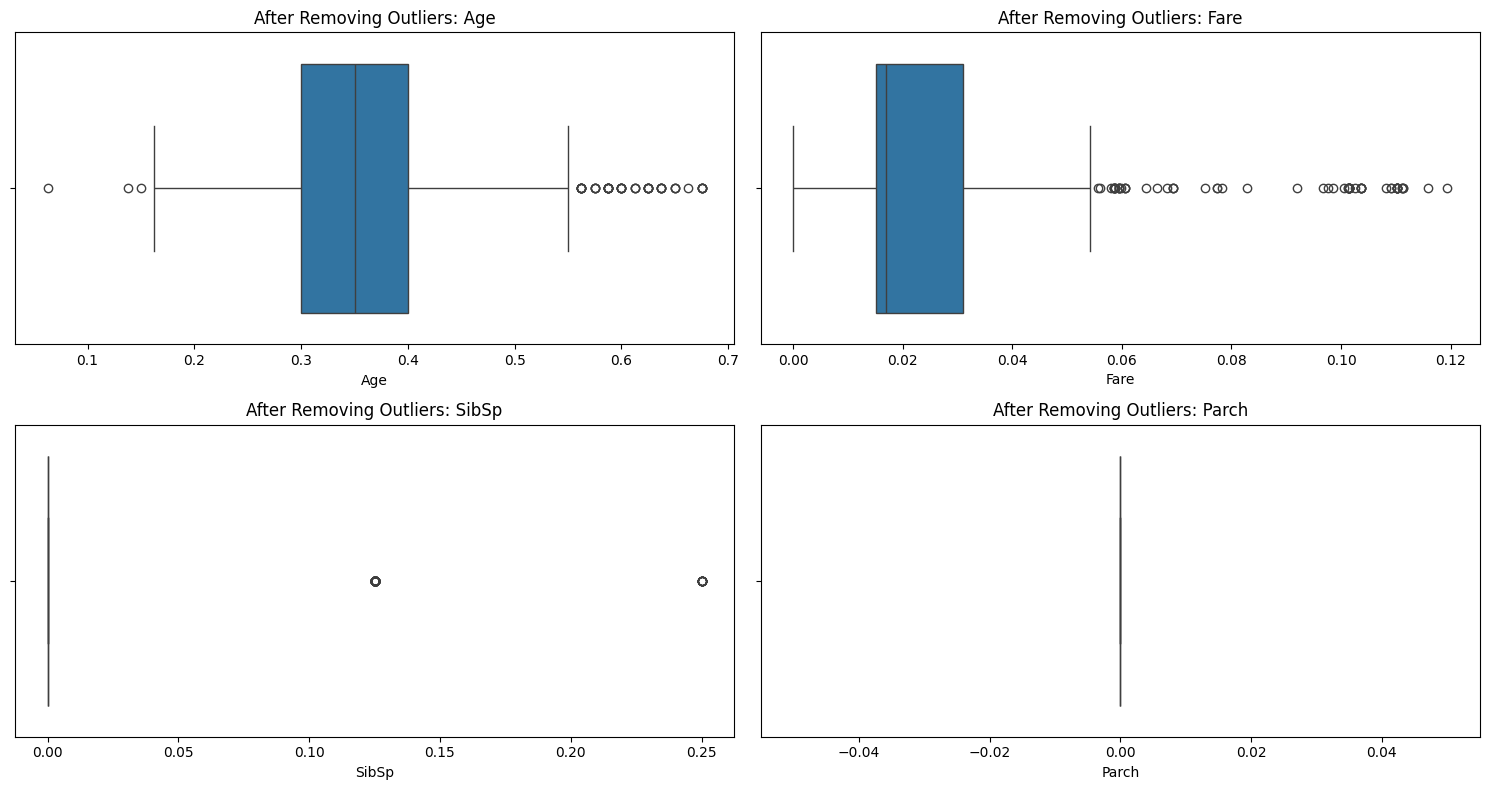

In [134]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_outlier[col])
    plt.title(f"After Removing Outliers: {col}")
plt.tight_layout()
plt.show()
